# Cogs 108 Final Project

Bernard Suwirjo

Ben Hazarian

Cesar Reyes

Eric Jiang

Gauthier Pred'Astor Gris

In [21]:
# Necessary Imports
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# Load Datasets

# Basketball Dataset
nba_data = pd.read_csv('data/nba.games.stats.csv')

In [3]:
nba_data['Date'] = pd.to_datetime(nba_data['Date'])

In [7]:
one_season = nba_data.loc[(nba_data['Date'] >= '2016-10-25') & (nba_data['Date'] <= '2017-04-12')]
one_season = one_season.drop(columns = ['Date', 'Unnamed: 0'])
one_season['WINorLOSS'] = one_season['WINorLOSS'].eq('W').mul(1)
one_season.head()

,Team,Game,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
4920,ATL,1,Home,WAS,1,114,99,44,88,0.500,...,13,18,0.722,12,40,25,14,4,19,20
4921,ATL,2,Away,PHI,1,104,72,42,85,0.494,...,11,15,0.733,4,39,16,9,5,20,20
4922,ATL,3,Home,SAC,1,106,95,33,79,0.418,...,13,19,0.684,6,38,26,10,6,19,34
4923,ATL,4,Home,LAL,0,116,123,41,85,0.482,...,18,20,0.900,11,42,24,11,9,15,25
4924,ATL,5,Away,WAS,0,92,95,32,83,0.386,...,28,35,0.800,11,46,13,7,3,19,23


In [8]:
teams_ha = one_season.groupby(['Team', 'Home']).sum()

In [9]:
home_win_percentages = teams_ha['WINorLOSS']/41

In [10]:
win_percent_team = home_win_percentages.unstack().plot.bar(figsize=(20,8))
win_percent_team.set_ylabel("Win %")

Text(0, 0.5, 'Win %')

In [11]:
team_scores = one_season[['Team','WINorLOSS', 'Game', 'Home','TeamPoints', 'OpponentPoints']]
team_scores = team_scores[team_scores['WINorLOSS'] == 1]
team_scores['ScoreDiff'] = team_scores['TeamPoints'].sub(team_scores['OpponentPoints'], axis=0)

In [12]:
ha_win_score_diff = team_scores.groupby(['Team','Home']).mean()['ScoreDiff']

Text(0, 0.5, 'Avg Score Differential in Wins')

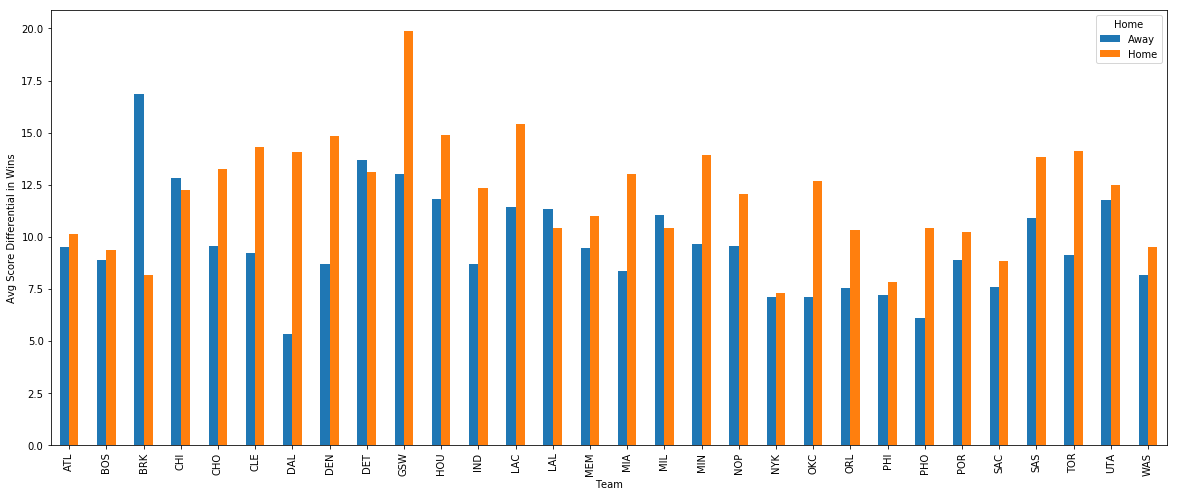

In [13]:
score_diff = ha_win_score_diff.unstack().plot.bar(figsize=(20,8))
score_diff.set_ylabel("Avg Score Differential in Wins")

In [14]:
df_ha = ha_win_score_diff.unstack()
len(df_ha.loc[df_ha['Home'] > df_ha['Away']])

25

In [19]:
home_greater = df_ha.loc[df_ha['Home'] > df_ha['Away']]
home_greater['Home'].mean() - home_greater['Away'].mean()

3.25724297549729

In [25]:
stats.ttest_ind(home_greater['Home'], home_greater['Away'], equal_var = False)

Ttest_indResult(statistic=4.860888174640401, pvalue=1.7247253869154674e-05)

There are 25 teams that have a greater score differential in home wins than away wins. The average score differential for these 25 teams is 3.257 points. Running a t-test at the 0.05 confidence level gives a p-value lower than 0.05, so we can say that the score differential difference is statistically significant.